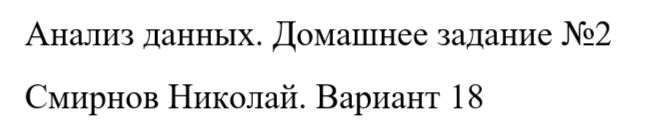

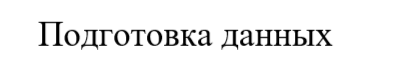

In [1]:
import pandas as pd

In [2]:
#df = pd.read_excel('your_file.xlsx', sheet_name='Sheet1')  
X = pd.read_excel('X_4_18.xlsx')  
Y = pd.read_excel('Y_4_18.xlsx')  

In [3]:
X

,/1,/2,/3,/4
0,1.896301,-0.520150,5.353052,-3.456750
1,0.570910,-0.626722,3.021986,-2.451076
2,1.877536,-0.496243,5.243802,-3.366266
3,2.094817,-0.287397,5.051825,-2.957008
4,2.094484,-0.283138,5.038384,-2.943899
...,...,...,...,...
195,1.708716,-0.652341,5.374455,-3.665740
196,0.476864,-0.757491,3.226201,-2.749337
197,0.503526,-0.793559,3.387728,-2.884202
198,0.218567,-0.850231,2.987826,-2.769259


In [4]:
Y

,/1,/2,/3,/4
0,0.828230,1.025571,0.954909,1.156479
1,1.161328,1.116439,1.099099,1.299740
2,1.847262,0.899565,1.775662,1.118181
3,0.871853,0.338183,0.168432,1.019193
4,1.837786,1.134509,1.971086,1.183672
...,...,...,...,...
195,1.914638,1.101274,1.838271,0.893890
196,0.979460,-0.161531,0.183026,1.004146
197,0.980254,-0.497277,0.240622,0.849511
198,0.839932,-0.046718,0.069418,1.108501


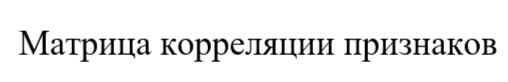

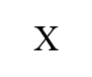

<Axes: >

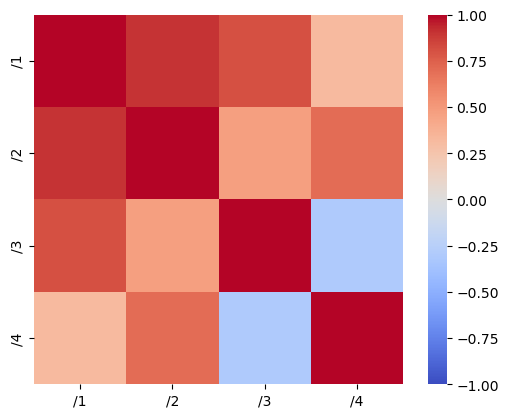

In [5]:
import seaborn as sns

corr_mat = X.corr()
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')

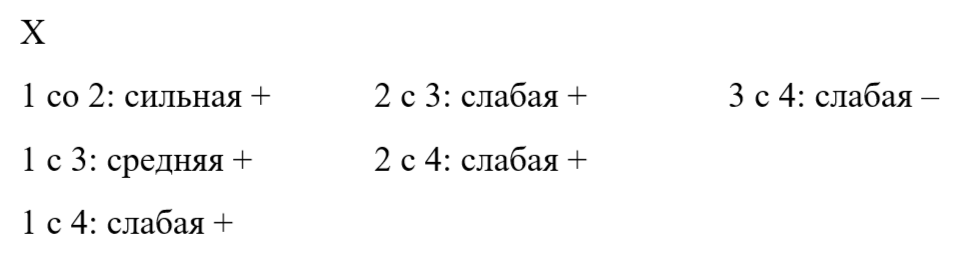

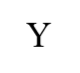

<Axes: >

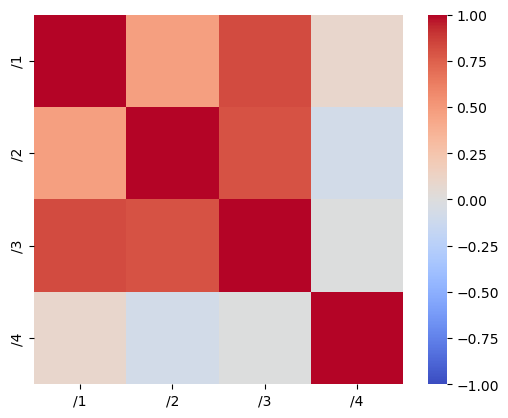

In [6]:
corr_mat = Y.corr()
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')

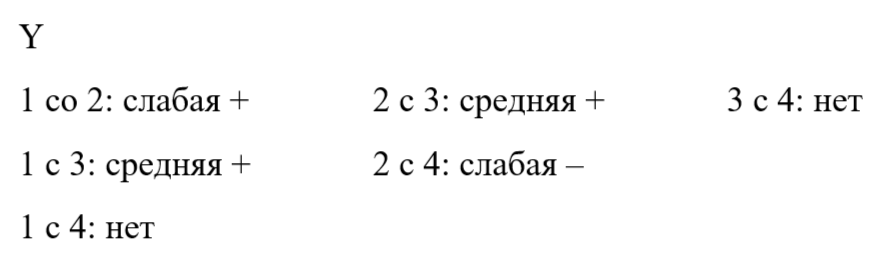

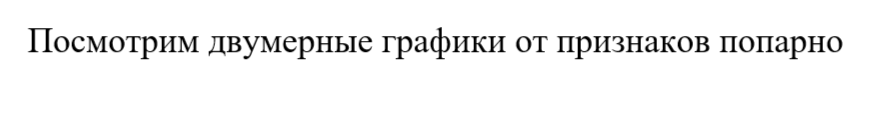

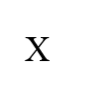

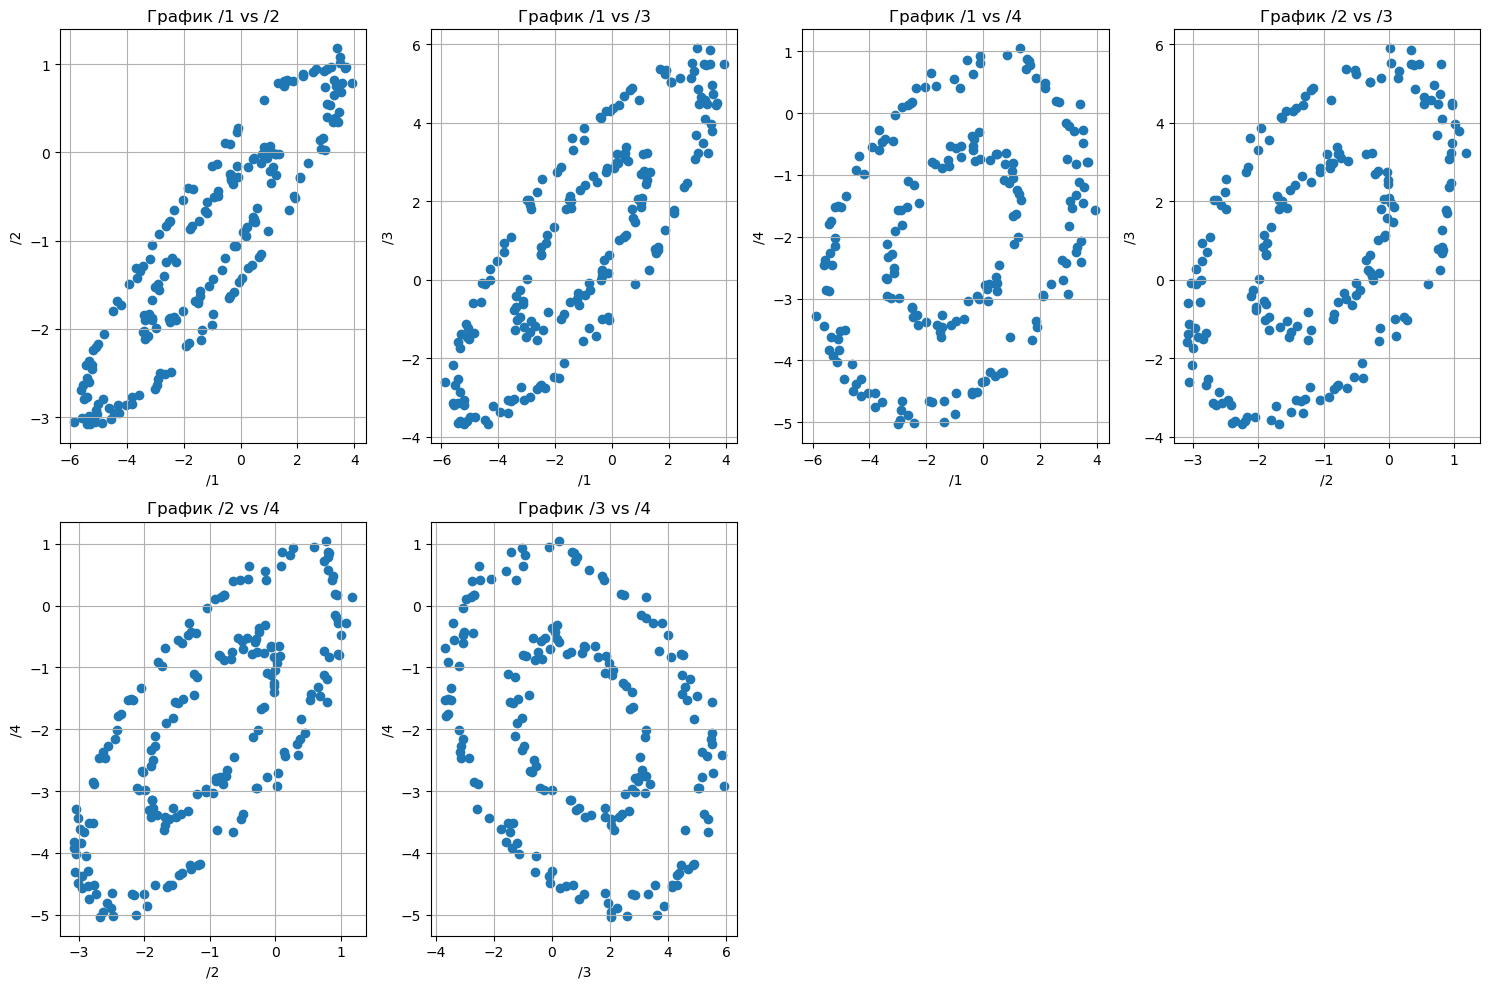

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# Определяем все комбинации столбцов
columns = X.columns
combinations = list(itertools.combinations(columns, 2))

# Создание графиков для каждой комбинации
plt.figure(figsize=(15, 10))
for i, (col1, col2) in enumerate(combinations):
    plt.subplot(2, len(combinations)//2 + 1, i + 1)
    plt.scatter(X[col1], X[col2])
    plt.title(f'График {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)

plt.tight_layout()
plt.show()


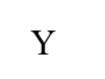

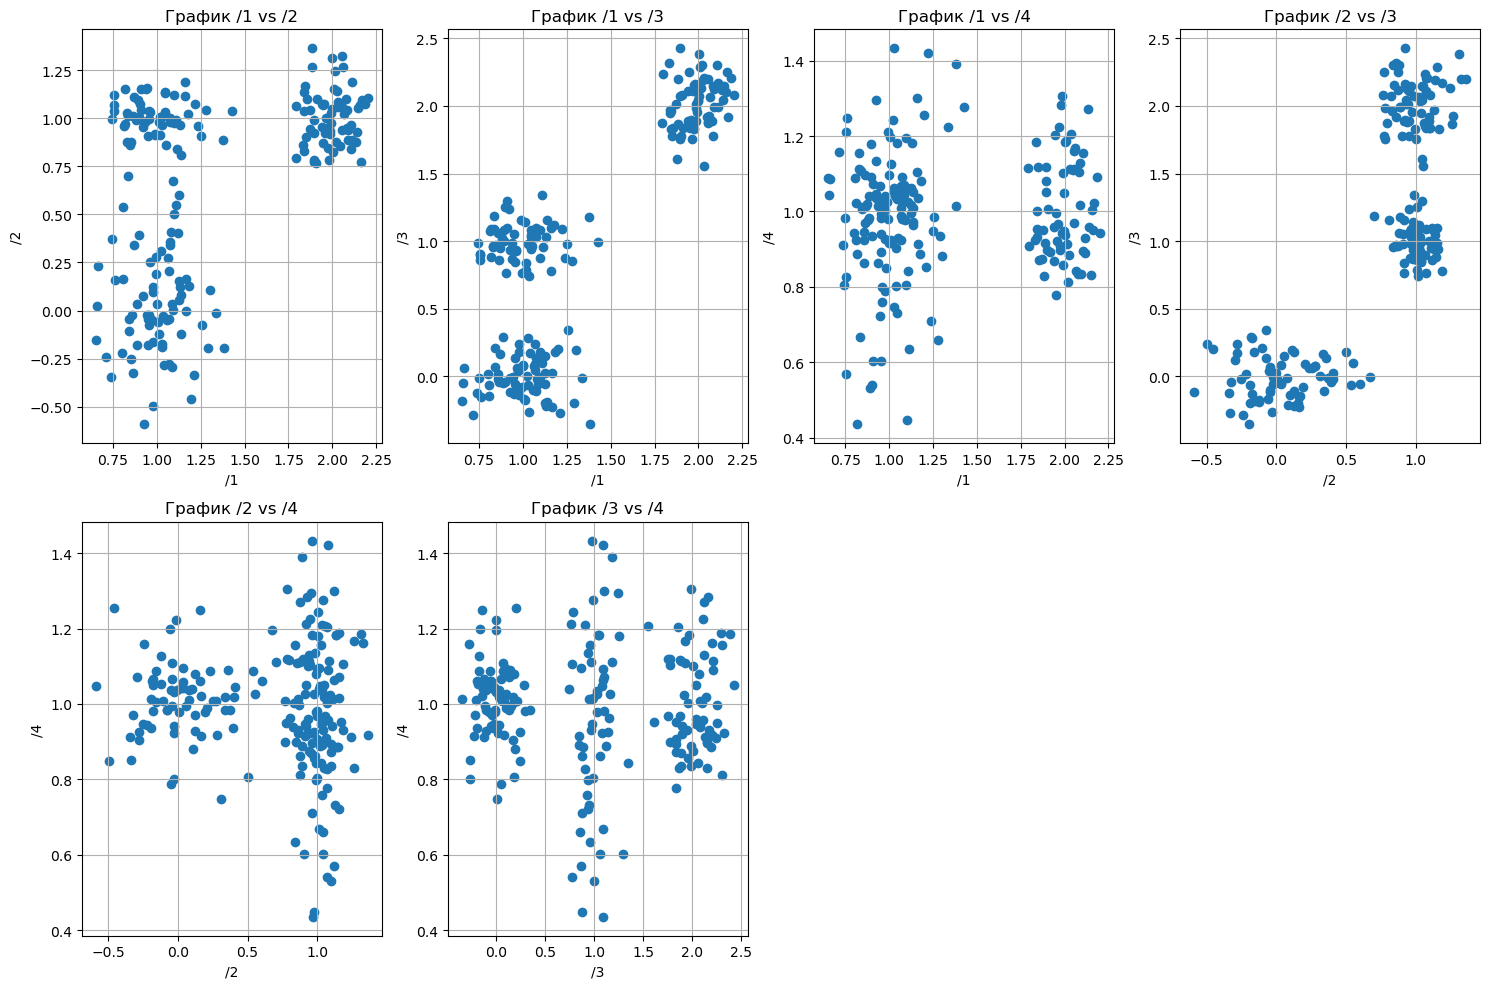

In [90]:
# Определяем все комбинации столбцов
columns = Y.columns
combinations = list(itertools.combinations(columns, 2))

# Создание графиков для каждой комбинации
plt.figure(figsize=(15, 10))
for i, (col1, col2) in enumerate(combinations):
    plt.subplot(2, len(combinations)//2 + 1, i + 1)
    plt.scatter(Y[col1], Y[col2])
    plt.title(f'График {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)

plt.tight_layout()
plt.show()

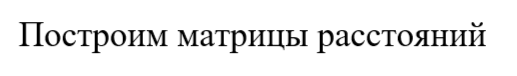

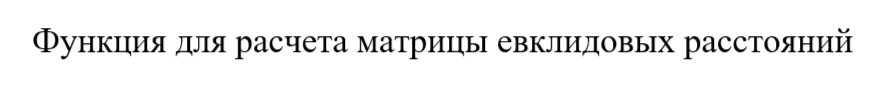

In [7]:
import numpy as np

def calculate_euclidean_distance_matrix(df):
    """
    Функция для расчета матрицы евклидовых расстояний.
    
    Параметры:
    df : pd.DataFrame
        DataFrame с координатами точек.
        
    Возвращает:
    pd.DataFrame
        Матрица евклидовых расстояний между точками.
    """
    # Инициализация матрицы расстояний
    num_points = df.shape[0]
    distance_matrix = np.zeros((num_points, num_points))

    # Расчет евклидовых расстояний
    for i in range(num_points):
        for j in range(num_points):
            if i != j:  # Избегаем расчета расстояния до самой себя
                distance_matrix[i][j] = np.sqrt(np.sum((df.iloc[i] - df.iloc[j]) ** 2))
                #df.iloc[i] возвращает строку DataFrame df, соответствующую индексу i. Это будет представлять собой координаты точки i.

    # Преобразуем матрицу в DataFrame для удобства
    return distance_matrix

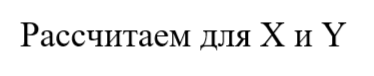

In [8]:
X_eucl_dist = calculate_euclidean_distance_matrix(X)
X_eucl_dist

array([[0.        , 2.86588005, 0.14507433, ..., 2.49095997, 2.99844628,
        2.70764918],
       [2.86588005, 0.        , 2.73830921, ..., 0.59476123, 0.5258408 ,
        0.40381302],
       [0.14507433, 2.73830921, 0.        , ..., 2.37775007, 2.88501815,
        2.59073538],
       ...,
       [2.49095997, 0.59476123, 2.37775007, ..., 0.        , 0.50749085,
        0.23979944],
       [2.99844628, 0.5258408 , 2.88501815, ..., 0.50749085, 0.        ,
        0.31268339],
       [2.70764918, 0.40381302, 2.59073538, ..., 0.23979944, 0.31268339,
        0.        ]])

In [9]:
Y_eucl_dist = calculate_euclidean_distance_matrix(Y)
Y_eucl_dist

array([[0.        , 0.40065638, 1.31506809, ..., 1.71656971, 1.39152332,
        1.44386561],
       [0.40065638, 0.        , 1.00411173, ..., 1.89117913, 1.59782598,
        1.60428929],
       [1.31506809, 1.00411173, 0.        , ..., 2.26525969, 2.19579773,
        2.16614968],
       ...,
       [1.71656971, 1.89117913, 2.26525969, ..., 0.        , 0.56487171,
        0.65260723],
       [1.39152332, 1.59782598, 2.19579773, ..., 0.56487171, 0.        ,
        0.29358555],
       [1.44386561, 1.60428929, 2.16614968, ..., 0.65260723, 0.29358555,
        0.        ]])

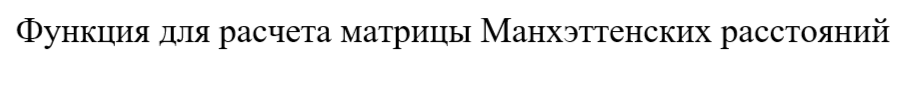

In [10]:
def calculate_manhattan_distance_matrix(df):
    """
    Функция для расчета матрицы Манхэттенских расстояний.
    
    Параметры:
    df : pd.DataFrame
        DataFrame с координатами точек.
        
    Возвращает:
    pd.DataFrame
        Матрица Манхэттенских расстояний между точками.
    """
    # Инициализация матрицы расстояний
    num_points = df.shape[0]
    distance_matrix = np.zeros((num_points, num_points))

    # Расчет Манхэттенских расстояний
    for i in range(num_points):
        for j in range(num_points):
            if i != j:  # Избегаем расчета расстояния до самой себя
                distance_matrix[i][j] = np.sum(np.abs(df.iloc[i] - df.iloc[j]))

    # Преобразуем матрицу в DataFrame для удобства
    return distance_matrix

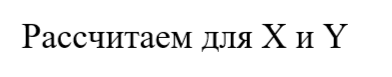

In [11]:
X_manh_dist = calculate_manhattan_distance_matrix(X)
X_manh_dist

array([[0.        , 4.76870393, 0.24240556, ..., 4.20405539, 5.06053159,
        4.56708391],
       [4.76870393, 0.        , 4.57411149, ..., 1.03308897, 0.92819352,
        0.75904339],
       [0.24240556, 4.57411149, 0.        , ..., 4.00946296, 4.86593915,
        4.37249147],
       ...,
       [4.20405539, 1.03308897, 4.00946296, ..., 0.        , 0.85647619,
        0.40415354],
       [5.06053159, 0.92819352, 4.86593915, ..., 0.85647619, 0.        ,
        0.51704424],
       [4.56708391, 0.75904339, 4.37249147, ..., 0.40415354, 0.51704424,
        0.        ]])

In [12]:
Y_manh_dist = calculate_manhattan_distance_matrix(Y)
Y_manh_dist

array([[0.        , 0.7114177 , 2.00408784, ..., 2.69612561, 2.01745898,
        2.36162384],
       [0.7114177 , 0.        , 1.76093002, ..., 3.10349693, 2.7054739 ,
        2.55622714],
       [2.00408784, 1.76093002, 0.        , ..., 4.06755964, 3.66953661,
        3.52028985],
       ...,
       [2.69612561, 3.10349693, 4.06755964, ..., 0.        , 1.02107469,
        1.14384011],
       [2.01745898, 2.7054739 , 3.66953661, ..., 1.02107469, 0.        ,
        0.50600167],
       [2.36162384, 2.55622714, 3.52028985, ..., 1.14384011, 0.50600167,
        0.        ]])

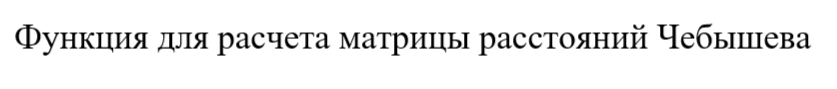

In [13]:
def calculate_chebyshev_distance_matrix(df):
    """
    Функция для расчета матрицы расстояний Чебышева.
    
    Параметры:
    df : pd.DataFrame
        DataFrame с координатами точек.
        
    Возвращает:
    pd.DataFrame
        Матрица расстояний Чебышева между точками.
    """
    # Инициализация матрицы расстояний
    num_points = df.shape[0]
    distance_matrix = np.zeros((num_points, num_points))

    # Расчет расстояний Чебышева
    for i in range(num_points):
        for j in range(num_points):
            if i != j:  # Избегаем расчета расстояния до самой себя
                distance_matrix[i][j] = np.max(np.abs(df.iloc[i] - df.iloc[j]))

    return distance_matrix

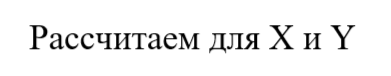

In [14]:
X_cheb_dist = calculate_chebyshev_distance_matrix(X)
X_cheb_dist

array([[0.        , 2.33106573, 0.1092495 , ..., 1.96532316, 2.36522532,
        2.15711867],
       [2.33106573, 0.        , 2.22181623, ..., 0.43312618, 0.35234252,
        0.30638465],
       [0.1092495 , 2.22181623, 0.        , ..., 1.85607366, 2.25597582,
        2.04786917],
       ...,
       [1.96532316, 0.43312618, 1.85607366, ..., 0.        , 0.39990216,
        0.19179551],
       [2.36522532, 0.35234252, 2.25597582, ..., 0.39990216, 0.        ,
        0.21990492],
       [2.15711867, 0.30638465, 2.04786917, ..., 0.19179551, 0.21990492,
        0.        ]])

In [15]:
Y_cheb_dist = calculate_chebyshev_distance_matrix(Y)
Y_cheb_dist

array([[0.        , 0.3330971 , 1.01903104, ..., 1.52284784, 1.0722892 ,
        1.01257212],
       [0.3330971 , 0.        , 0.68593394, ..., 1.61371646, 1.16315783,
        1.15676278],
       [1.01903104, 0.68593394, 0.        , ..., 1.53504004, 1.70624406,
        1.8333252 ],
       ...,
       [1.52284784, 1.61371646, 1.53504004, ..., 0.        , 0.45055863,
        0.53147703],
       [1.0722892 , 1.16315783, 1.70624406, ..., 0.45055863, 0.        ,
        0.24670581],
       [1.01257212, 1.15676278, 1.8333252 , ..., 0.53147703, 0.24670581,
        0.        ]])

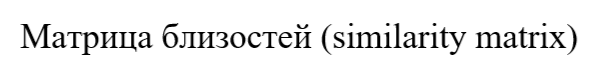

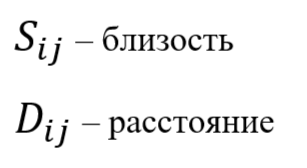

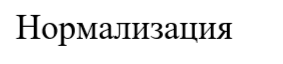

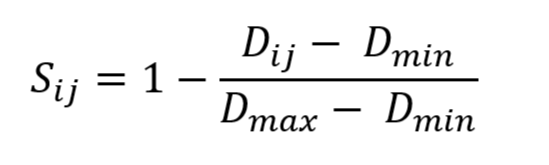

In [16]:
def distance_to_similarity_normalized(distance_matrix):
    D_min = np.min(distance_matrix)
    D_max = np.max(distance_matrix)
    similarity_matrix = 1 - (distance_matrix - D_min) / (D_max - D_min)
    np.fill_diagonal(similarity_matrix, 1)  # Элементы на главной диагонали равны 1
    return similarity_matrix

X_eucl_dist      
Y_eucl_dist            
     
X_manh_dist         
Y_manh_dist      
    
X_cheb_dist       
Y_cheb_dist    

In [17]:
X_eucl_sim_norm = distance_to_similarity_normalized(X_eucl_dist)
Y_eucl_sim_norm = distance_to_similarity_normalized(Y_eucl_dist)         
     
X_manh_sim_norm = distance_to_similarity_normalized(X_manh_dist)     
Y_manh_sim_norm = distance_to_similarity_normalized(Y_manh_dist)  
    
X_cheb_sim_norm = distance_to_similarity_normalized(X_cheb_dist)  
Y_cheb_sim_norm = distance_to_similarity_normalized(Y_cheb_dist)

In [18]:
X_eucl_sim_norm

array([[1.        , 0.78710826, 0.98922316, ..., 0.81495918, 0.77726058,
        0.79886243],
       [0.78710826, 1.        , 0.79658485, ..., 0.95581819, 0.96093795,
        0.97000277],
       [0.98922316, 0.79658485, 1.        , ..., 0.82336897, 0.78568659,
        0.80754736],
       ...,
       [0.81495918, 0.95581819, 0.82336897, ..., 1.        , 0.96230107,
        0.98218651],
       [0.77726058, 0.96093795, 0.78568659, ..., 0.96230107, 1.        ,
        0.97677233],
       [0.79886243, 0.97000277, 0.80754736, ..., 0.98218651, 0.97677233,
        1.        ]])

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

def create_weighted_graph(similarity_matrix):
    """
    Создает полный неориентированный простой взвешенный граф из матрицы близости.

    :param similarity_matrix: 2D numpy array, матрица близости
    :return: NetworkX Graph объект
    """
    # Создание графа
    G = nx.Graph()

    # Количество узлов
    num_nodes = similarity_matrix.shape[0]

    # Добавление рёбер с весами на основе матрицы близости
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):  # Обходим только верхнюю половину матрицы
            weight = similarity_matrix[i][j]
            if weight > 0:  # Добавляем ребро только если вес больше 0
                G.add_edge(i, j, weight=weight)

    return G

def draw_graph(G):
    """
    Визуализирует граф.

    :param G: NetworkX Graph объект
    """
    pos = nx.spring_layout(G)  # Позиции для всех узлов
    nx.draw(G, pos, with_labels=True)
    
    #edge_labels = nx.get_edge_attributes(G, 'weight')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title("Полный неориентированный простой взвешенный граф")
    plt.show()

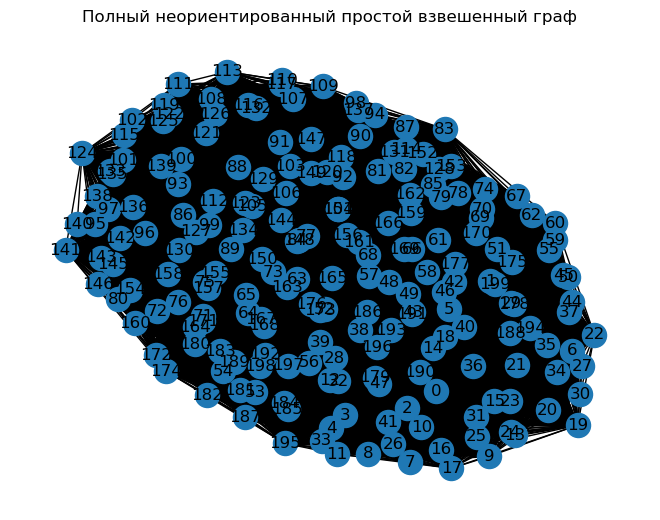

In [20]:
# Создание графа
graph = create_weighted_graph(X_eucl_sim_norm)

# Визуализация графа
draw_graph(graph)

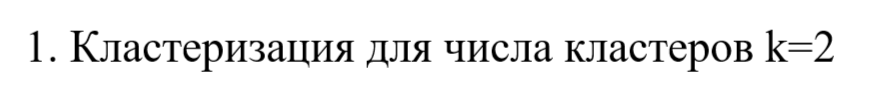

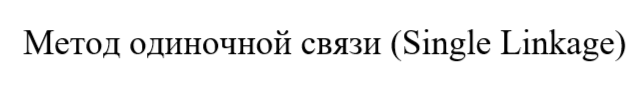

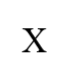

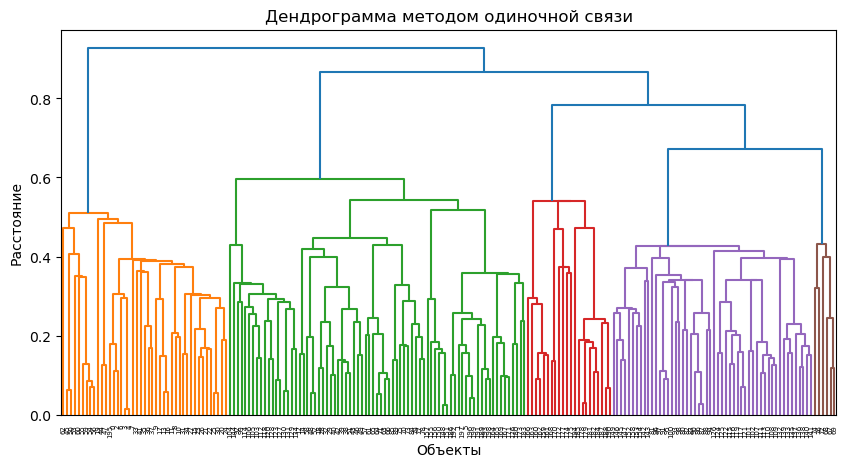

Кластеры: [1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1
 1 2 2 2 1 2 2 1 1 2 1 2 2 1 2 2 1 1 1 1 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2]


In [28]:
import scipy.cluster.hierarchy as sch

# Выполнение иерархической кластеризации
Z = sch.linkage(X_eucl_sim_norm, method='single')

# Визуализация дендрограммы
plt.figure(figsize=(10, 5))
sch.dendrogram(Z)
plt.title('Дендрограмма методом одиночной связи')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

# Разбиение на два кластера
from scipy.cluster.hierarchy import fcluster
single_clusters_X_eucl_sim_norm = fcluster(Z, t=2, criterion='maxclust')
print("Кластеры:", single_clusters_X_eucl_sim_norm)


In [95]:
single_clusters_X_eucl_sim_norm[single_clusters_X_eucl_sim_norm == 2] = 0

In [97]:
print("Кластеры:", single_clusters_X_eucl_sim_norm)

Кластеры: [1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

def show(X, clusters):
    # Определяем все комбинации столбцов
    columns = X.columns
    combinations = list(itertools.combinations(columns, 2))

    # Создание графиков для каждой комбинации
    plt.figure(figsize=(15, 10))
    for i, (col1, col2) in enumerate(combinations):
        plt.subplot(2, len(combinations)//2 + 1, i + 1)
        
        # Разделяем точки по меткам
        cluster_0 = X[clusters == 0]
        cluster_1 = X[clusters == 1]
        
        # Построение точек
        plt.scatter(cluster_0[col1], cluster_0[col2], color='purple', label='Cluster 0', alpha=0.6)
        plt.scatter(cluster_1[col1], cluster_1[col2], color='green', label='Cluster 1', alpha=0.6)
        
        plt.title(f'График {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(True)
        
    # Добавляем легенду
    plt.legend()
    plt.tight_layout()
    plt.show()

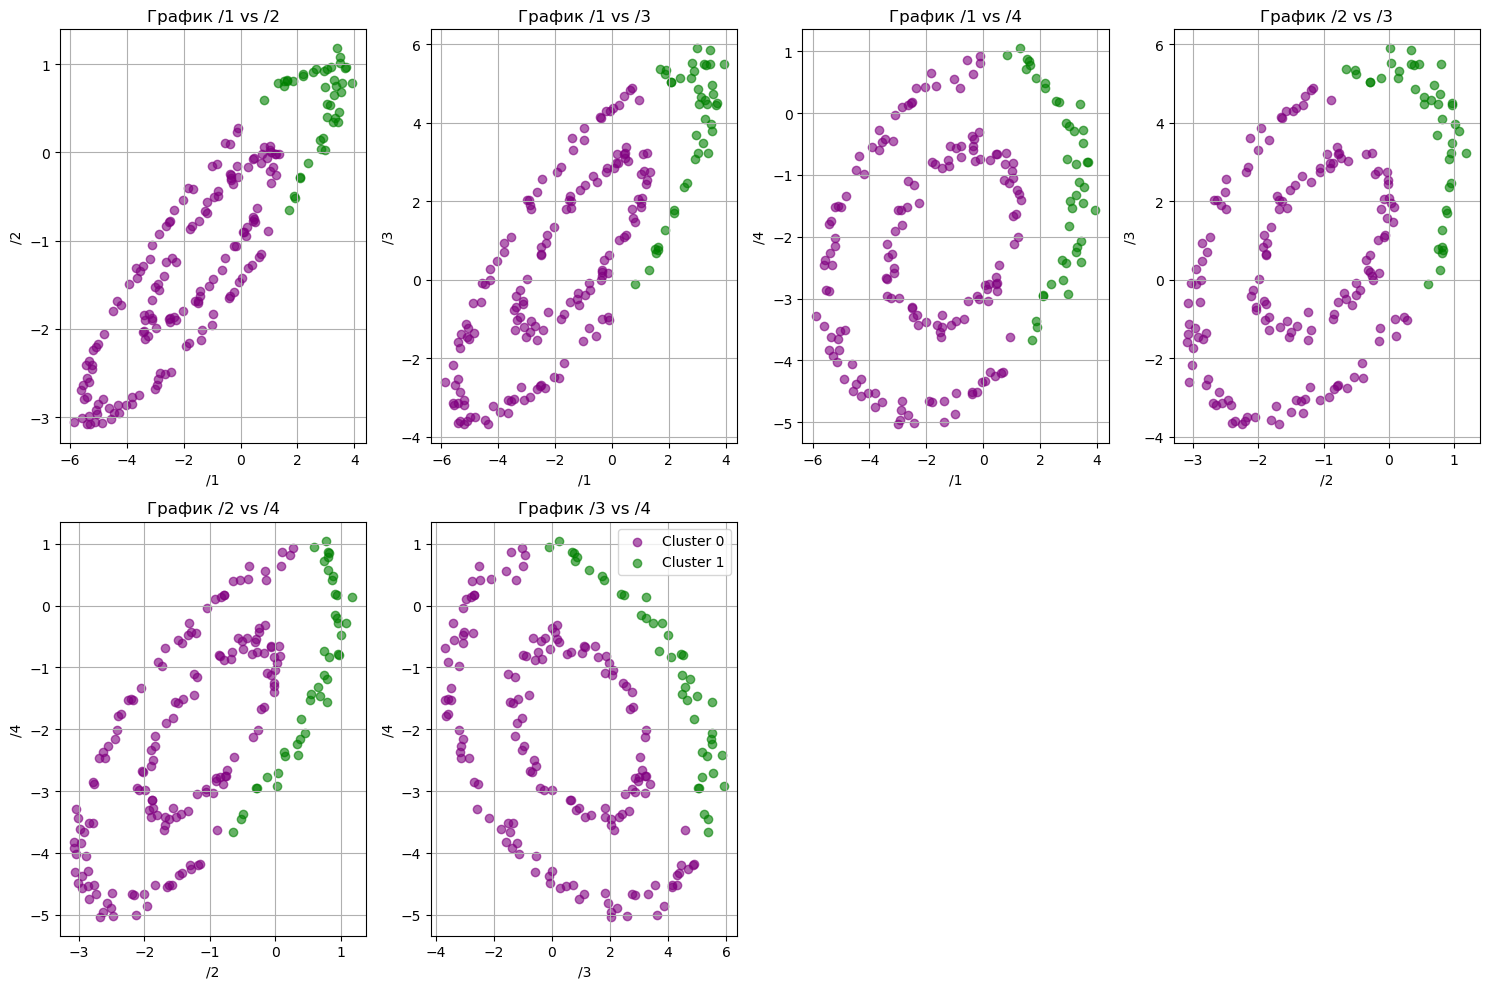

In [98]:
show(X, single_clusters_X_eucl_sim_norm)

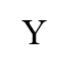

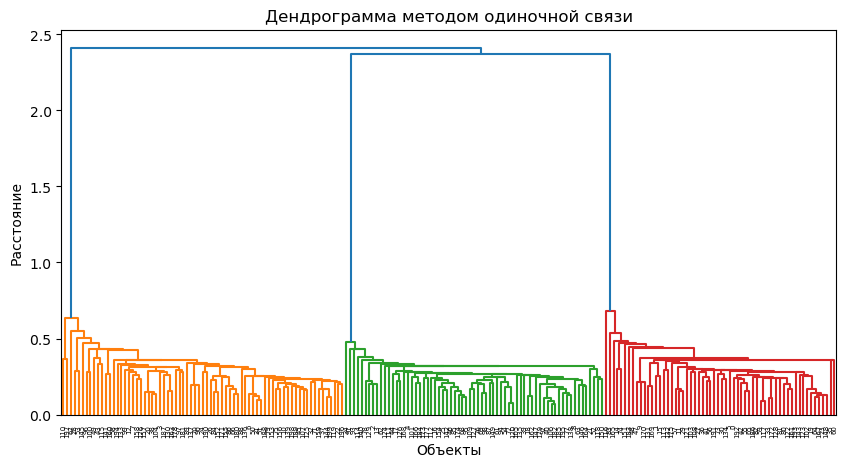

Кластеры: [2 2 2 1 2 2 1 1 2 2 1 2 1 2 2 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 2 1 1 2 2 2 2
 1 1 2 2 2 2 1 2 1 2 2 2 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 1 1 2 2
 2 1 2 2 2 1 2 2 2 2 1 2 1 2 1 1 1 2 2 2 2 2 1 1 2 1 1 2 2 2 1 2 2 1 2 2 1
 2 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 1 1 2 1 2 1 2 2 1 1 2 2
 2 2 2 2 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 1 2 1 1 2 2 2
 2 2 1 1 1 1 2 2 2 1 2 1 1 1 1]


In [104]:
# Выполнение иерархической кластеризации
Z = sch.linkage(Y_eucl_sim_norm, method='single')

# Визуализация дендрограммы
plt.figure(figsize=(10, 5))
sch.dendrogram(Z)
plt.title('Дендрограмма методом одиночной связи')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

# Разбиение на два кластера
from scipy.cluster.hierarchy import fcluster
single_clusters_Y_eucl_sim_norm = fcluster(Z, t=2, criterion='maxclust')
print("Кластеры:", single_clusters_Y_eucl_sim_norm)

In [105]:
single_clusters_Y_eucl_sim_norm[single_clusters_Y_eucl_sim_norm == 2] = 0

In [106]:
print("Кластеры:", single_clusters_Y_eucl_sim_norm)

Кластеры: [0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1]


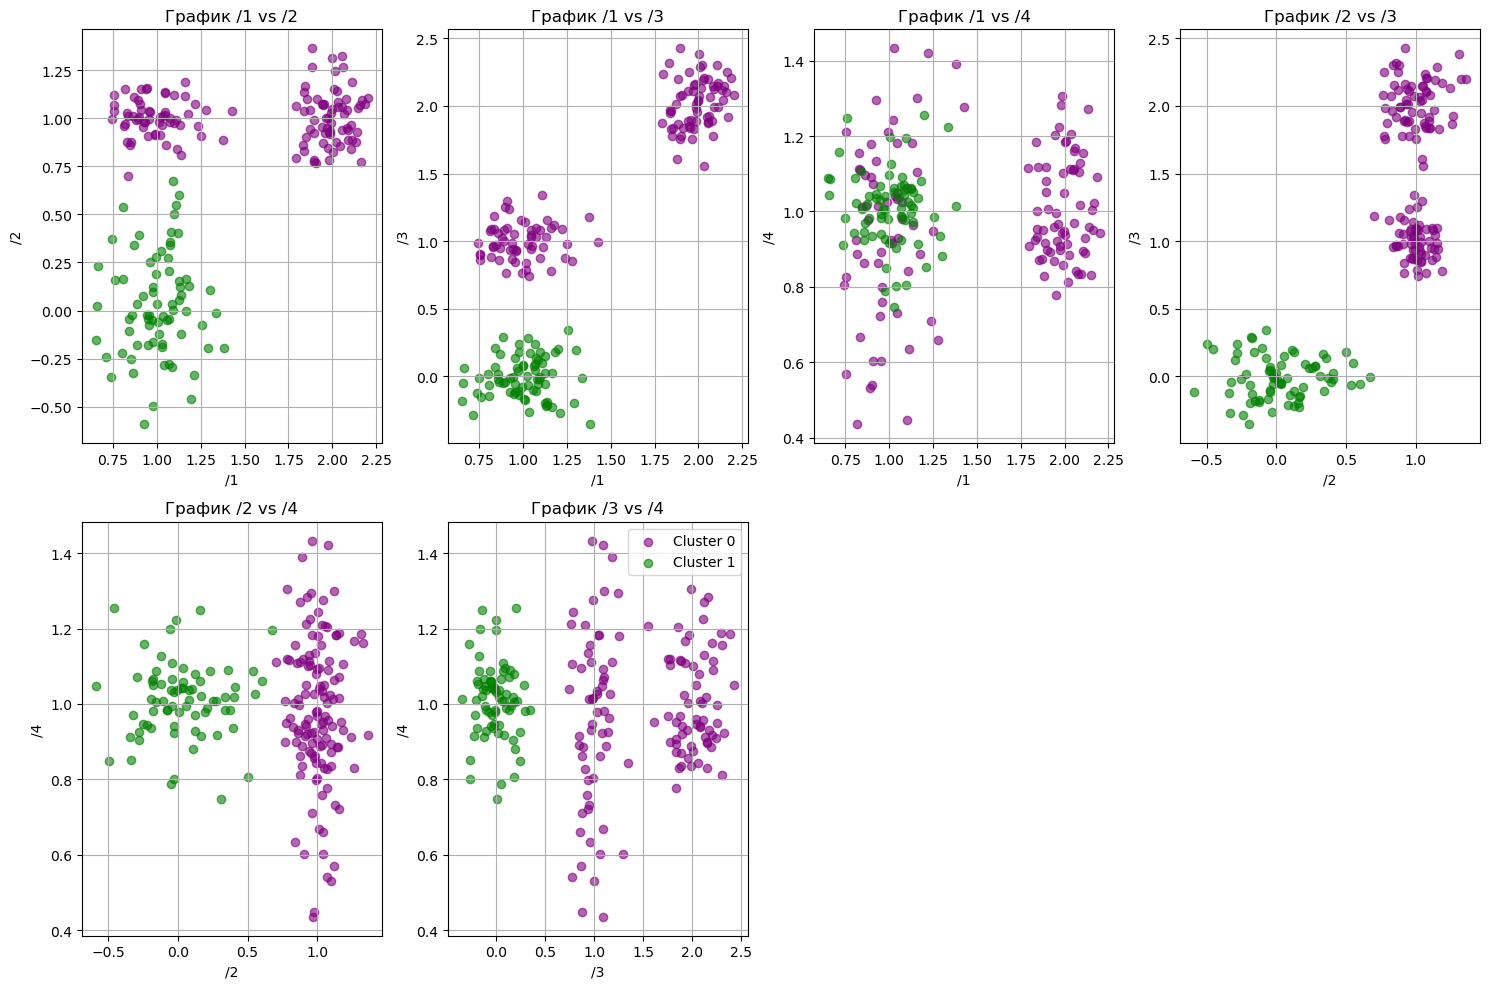

In [107]:
show(Y, single_clusters_Y_eucl_sim_norm)

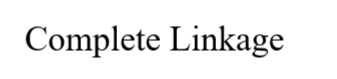

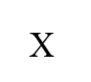

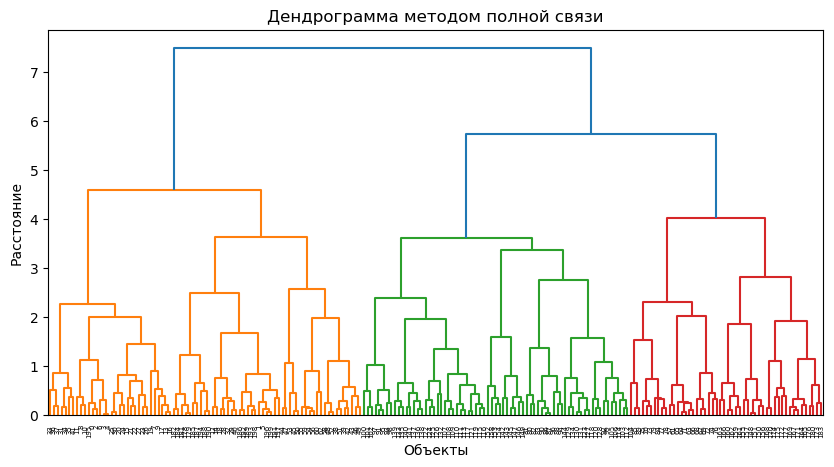

Кластеры: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [30]:
# Выполнение иерархической кластеризации методом полной связи
Z = sch.linkage(X_eucl_sim_norm, method='complete')

# Визуализация дендрограммы
plt.figure(figsize=(10, 5))
sch.dendrogram(Z)
plt.title('Дендрограмма методом полной связи')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

# Разбиение на два кластера
from scipy.cluster.hierarchy import fcluster
complete_clusters_X_eucl_sim_norm = fcluster(Z, t=2, criterion='maxclust')
print("Кластеры:", complete_clusters_X_eucl_sim_norm)


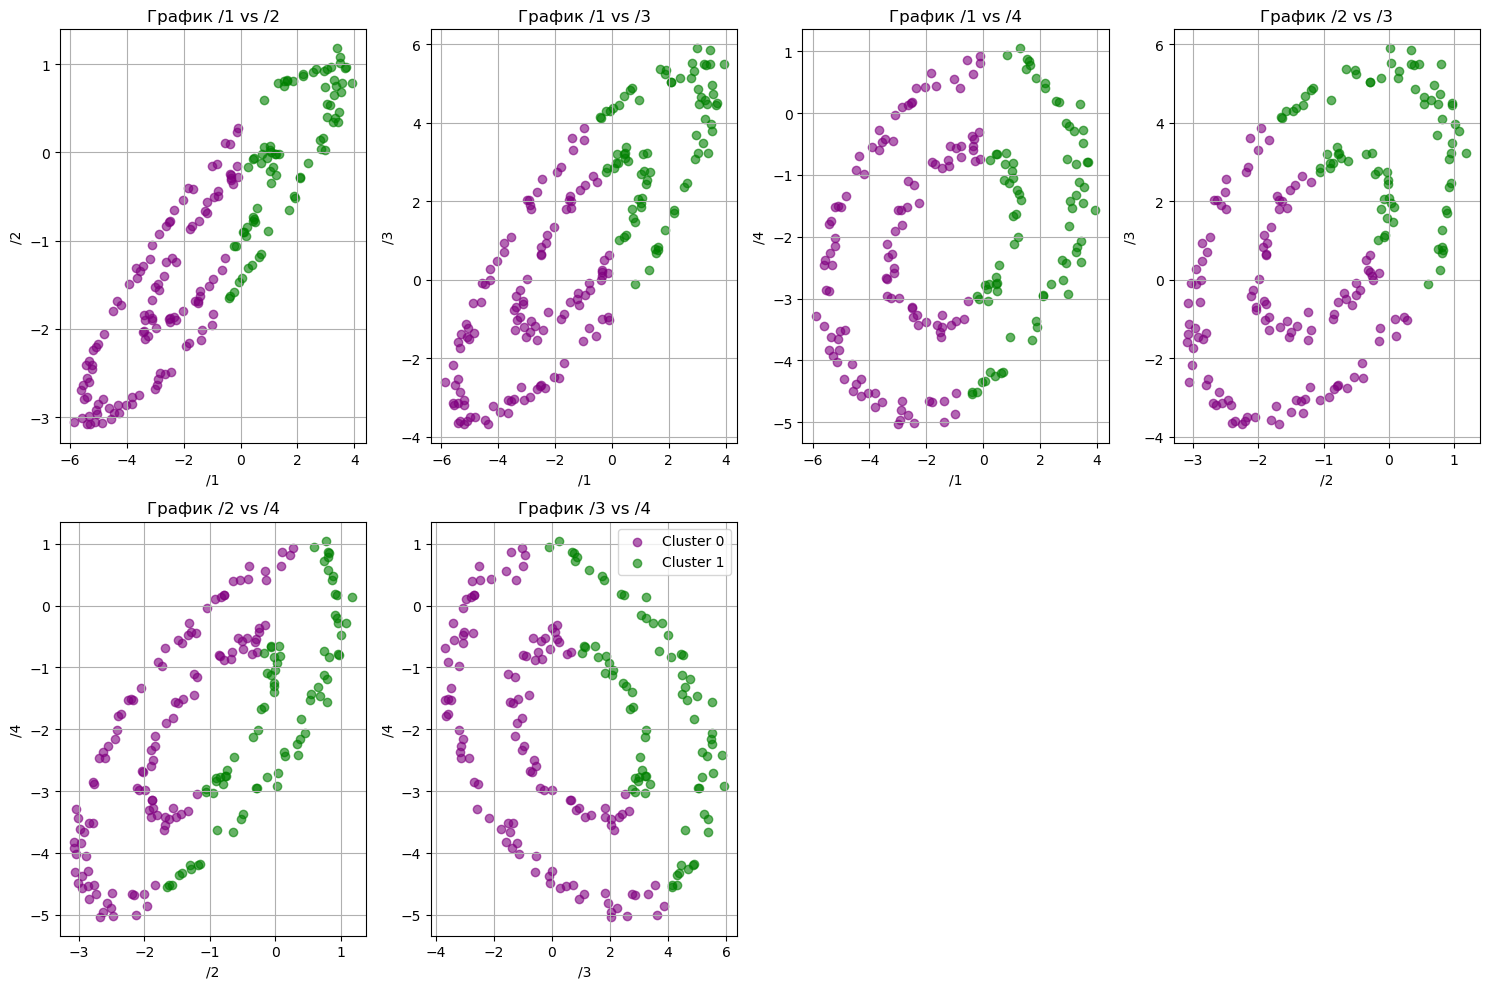

In [108]:
complete_clusters_X_eucl_sim_norm[complete_clusters_X_eucl_sim_norm == 2] = 0
show(X, complete_clusters_X_eucl_sim_norm)

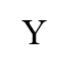

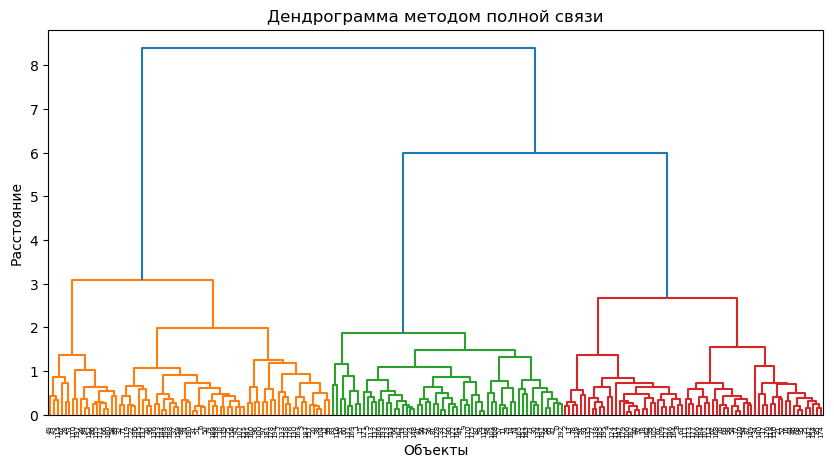

Кластеры: [2 2 2 1 2 2 1 1 2 2 1 2 1 2 2 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 2 1 1 2 2 2 2
 1 1 2 2 2 2 1 2 1 2 2 2 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 1 1 2 2
 2 1 2 2 2 1 2 2 2 2 1 2 1 2 1 1 1 2 2 2 2 2 1 1 2 1 1 2 2 2 1 2 2 1 2 2 1
 2 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 1 1 2 1 2 1 2 2 1 1 2 2
 2 2 2 2 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 1 2 1 1 2 2 2
 2 2 1 1 1 1 2 2 2 1 2 1 1 1 1]


In [31]:
# Выполнение иерархической кластеризации методом полной связи
Z = sch.linkage(Y_eucl_sim_norm, method='complete')

# Визуализация дендрограммы
plt.figure(figsize=(10, 5))
sch.dendrogram(Z)
plt.title('Дендрограмма методом полной связи')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

# Разбиение на два кластера
from scipy.cluster.hierarchy import fcluster
complete_clusters_Y_eucl_sim_norm = fcluster(Z, t=2, criterion='maxclust')
print("Кластеры:", complete_clusters_Y_eucl_sim_norm)


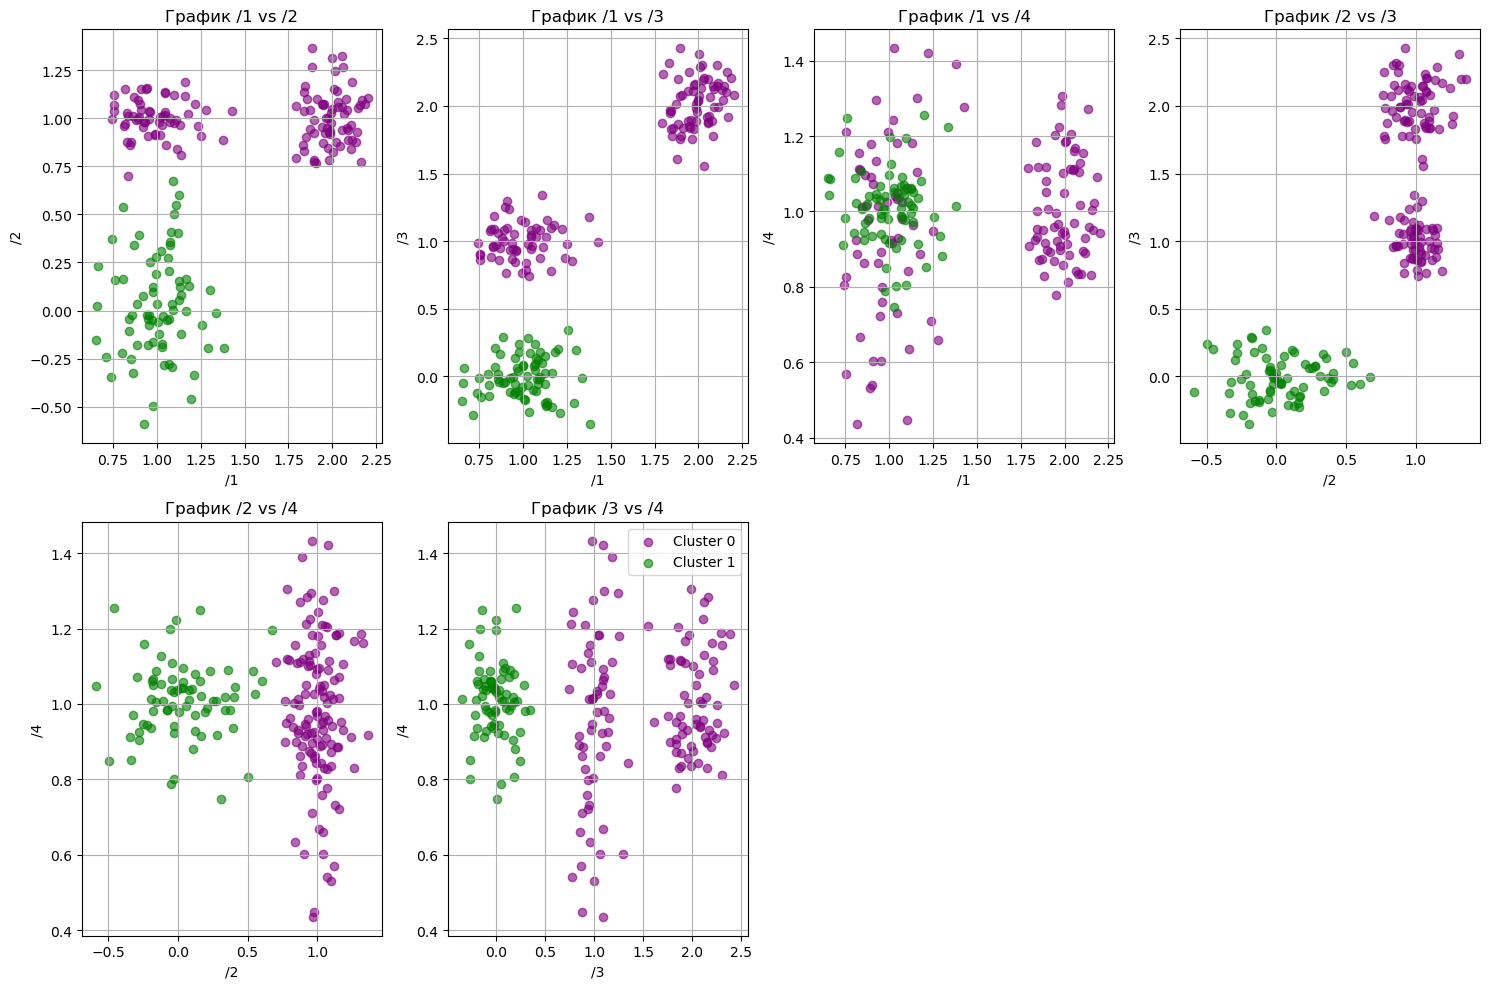

In [110]:
complete_clusters_Y_eucl_sim_norm[complete_clusters_Y_eucl_sim_norm == 2] = 0
show(Y, complete_clusters_Y_eucl_sim_norm)

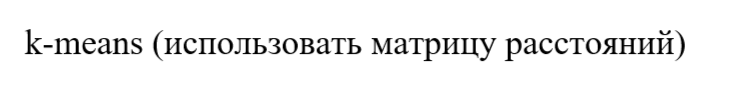

In [32]:
# Функция K-Means
def kmeans(distance_matrix, k=2, max_iters=100):
    n_samples = distance_matrix.shape[0]
    
    # Инициализация центров кластеров случайным образом
    initial_indices = np.random.choice(n_samples, size=k, replace=False)
    centroids = initial_indices
    
    # Главный цикл
    for _ in range(max_iters):
        # Присвоение объектов к кластерам
        distances_to_centroids = distance_matrix[:, centroids]
        labels = np.argmin(distances_to_centroids, axis=1)
        
        # Обновление центров кластеров
        new_centroids = []
        for i in range(k):
            cluster_points = np.where(labels == i)[0]
            if len(cluster_points) > 0:
                new_centroid = np.mean(distance_matrix[cluster_points][:, cluster_points], axis=0)
                new_centroids.append(np.argmin(new_centroid))
            else:
                new_centroids.append(centroids[i])  # Если нет точек в кластере, оставляем старый центр
        
        centroids = new_centroids
        
    return labels

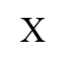

In [47]:
# Выполнение K-Means
km_clusters_X_eucl_dist = kmeans(X_eucl_dist, k=2)

# Вывод результатов
print("Кластеры:", km_clusters_X_eucl_dist)

Кластеры: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


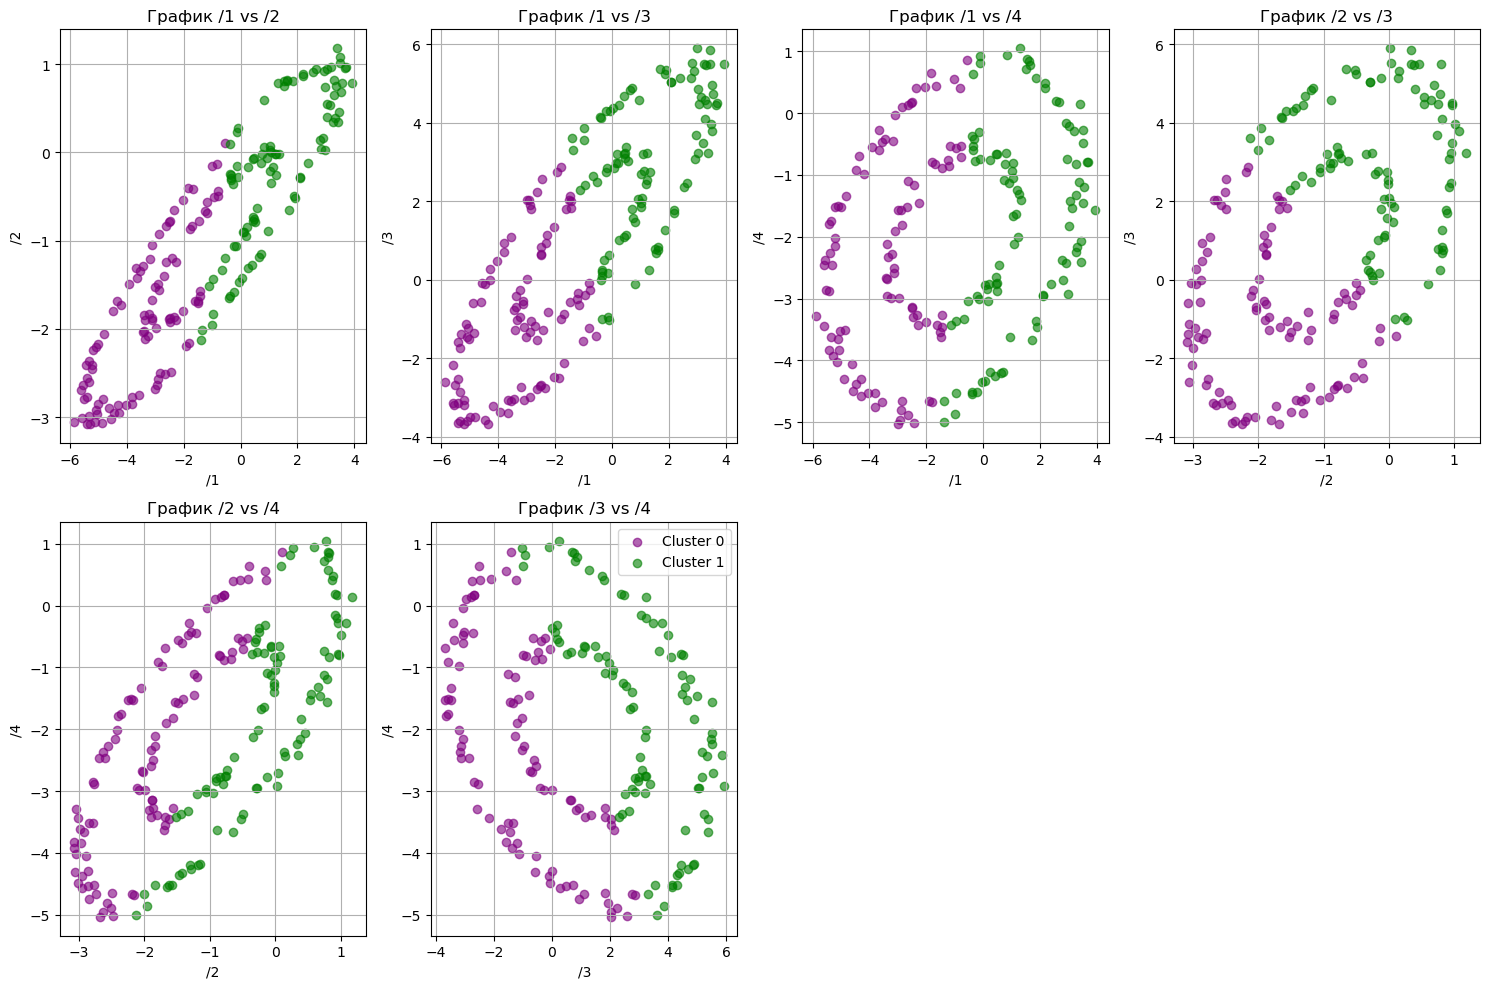

In [111]:
show(X, km_clusters_X_eucl_dist)

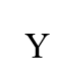

In [115]:
# Выполнение K-Means
km_clusters_Y_eucl_dist = kmeans(Y_eucl_dist, k=2)

# Вывод результатов
print("Кластеры:", km_clusters_Y_eucl_dist)

Кластеры: [0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1]


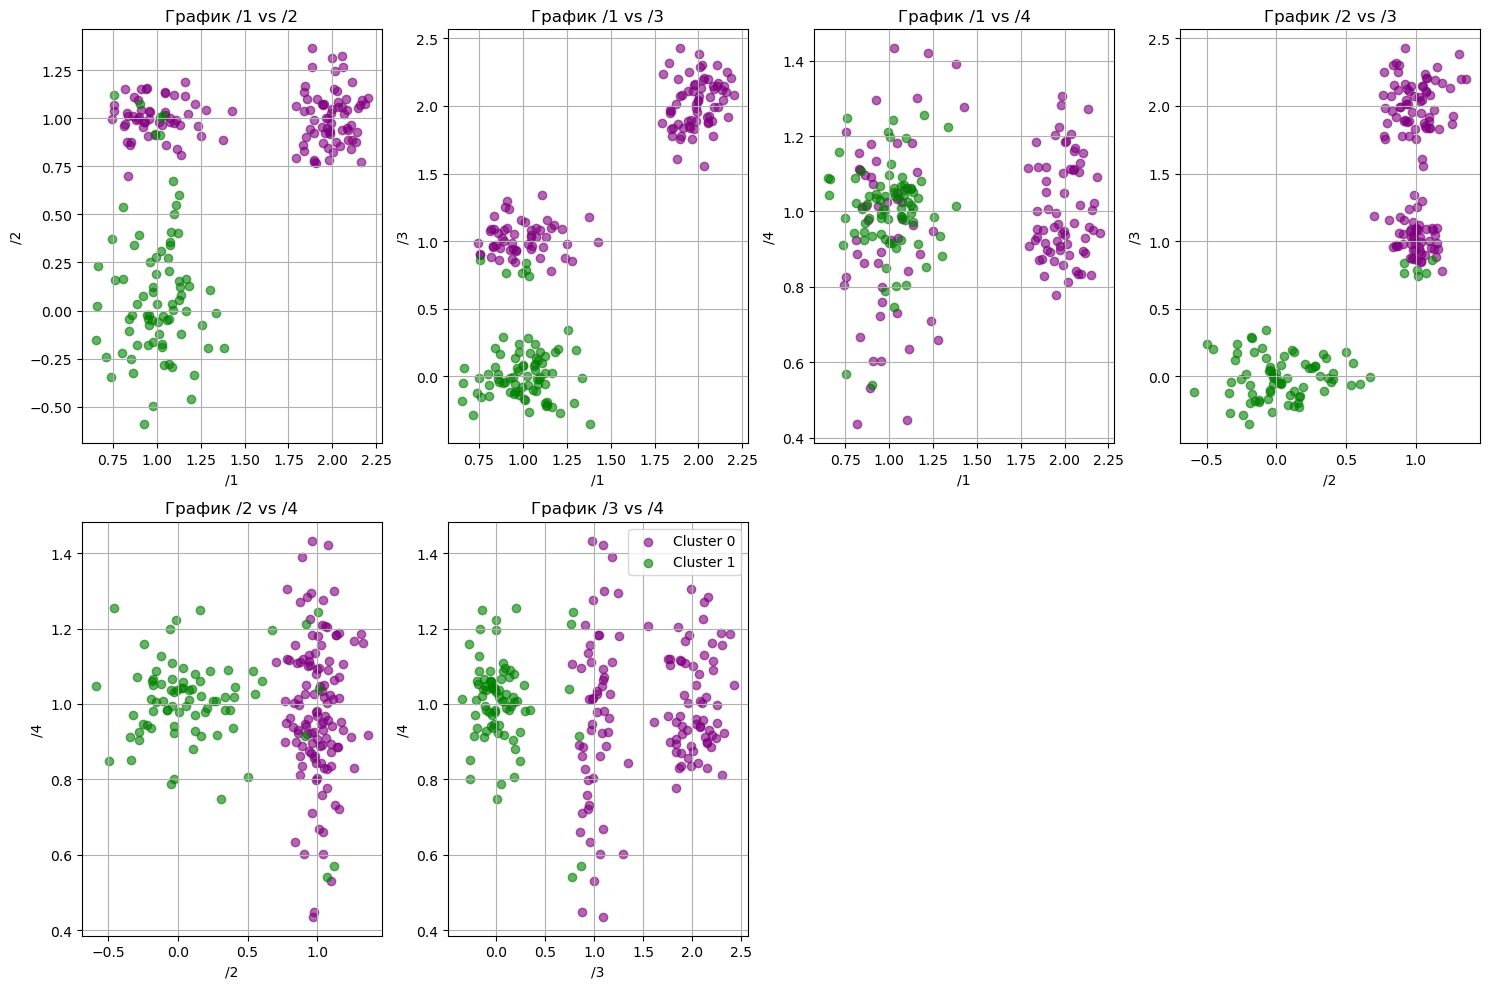

In [116]:
show(Y, km_clusters_Y_eucl_dist)

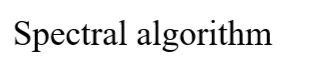

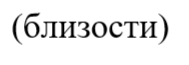

In [35]:
from sklearn.cluster import SpectralClustering

# Создание спектрального кластеризатора
# Используем нормализованную спектральную кластеризацию
spectral_clustering = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)

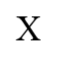

In [36]:
# Выполнение кластеризации
spectral_clusters_X_eucl_sim_norm = spectral_clustering.fit_predict(X_eucl_sim_norm)

# Вывод результатов
print("Кластеры:", spectral_clusters_X_eucl_sim_norm)

Кластеры: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


c:\Users\nicks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
spectral_clusters_X_eucl_sim_norm[spectral_clusters_X_eucl_sim_norm == 0] = 2
spectral_clusters_X_eucl_sim_norm[spectral_clusters_X_eucl_sim_norm == 1] = 0
spectral_clusters_X_eucl_sim_norm[spectral_clusters_X_eucl_sim_norm == 2] = 1

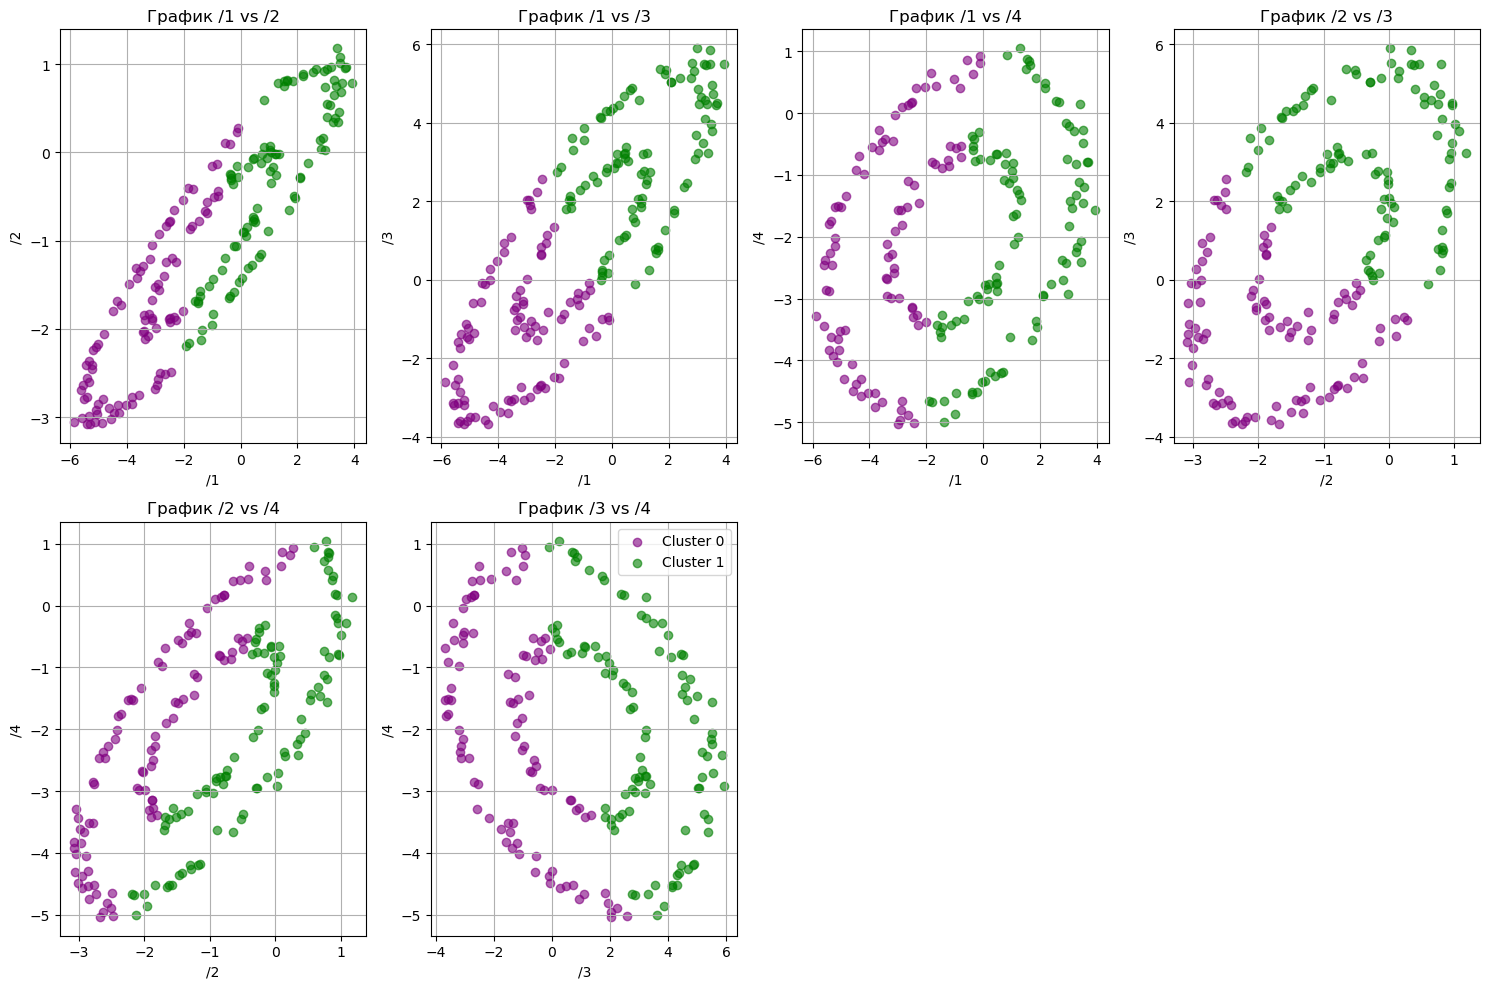

In [118]:
show(X, spectral_clusters_X_eucl_sim_norm)

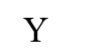

In [37]:
# Выполнение кластеризации
spectral_clusters_Y_eucl_sim_norm = spectral_clustering.fit_predict(Y_eucl_sim_norm)

# Вывод результатов
print("Кластеры:", spectral_clusters_Y_eucl_sim_norm)

Кластеры: [1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1
 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1
 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


c:\Users\nicks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [119]:
spectral_clusters_Y_eucl_sim_norm[spectral_clusters_Y_eucl_sim_norm == 0] = 2
spectral_clusters_Y_eucl_sim_norm[spectral_clusters_Y_eucl_sim_norm == 1] = 0
spectral_clusters_Y_eucl_sim_norm[spectral_clusters_Y_eucl_sim_norm == 2] = 1

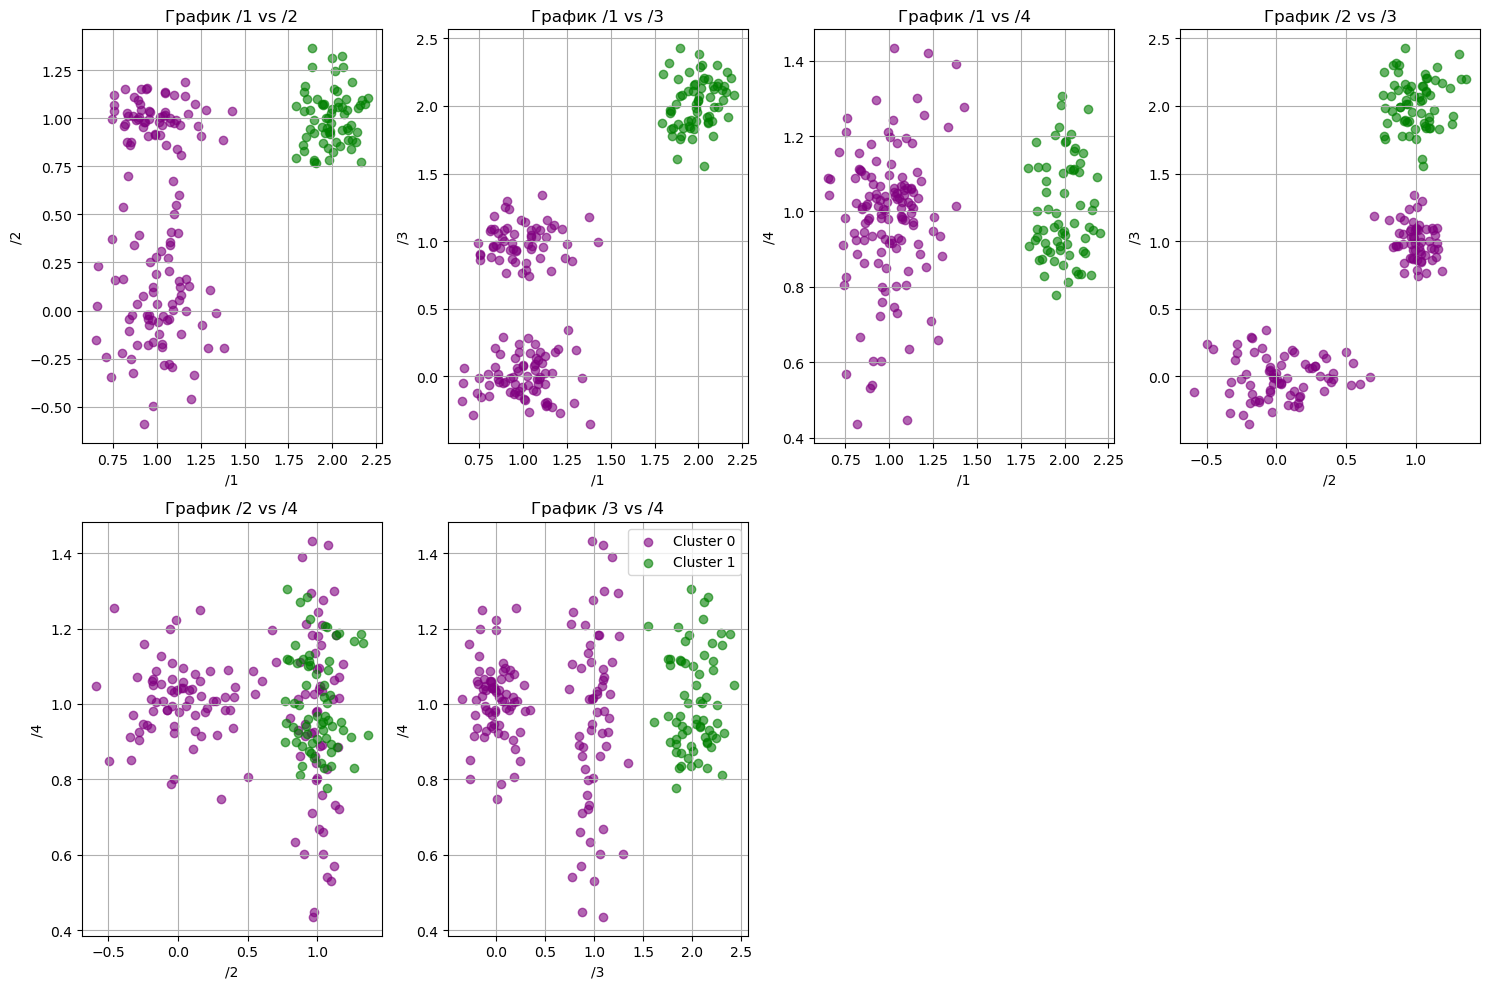

In [120]:
show(Y, spectral_clusters_Y_eucl_sim_norm)

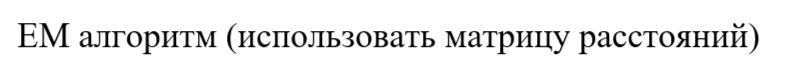

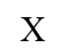

In [123]:
from sklearn.mixture import GaussianMixture
# Преобразование матрицы расстояний в данные для GMM
# Для этого можно использовать метод MDS (Multidimensional Scaling)
from sklearn.manifold import MDS

mds = MDS(dissimilarity='precomputed')
X_transformed = mds.fit_transform(X_eucl_dist)

# Кластеризация с использованием GMM
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_transformed)


c:\Users\nicks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=2, random_state=0)

In [45]:

# Получение меток кластеров
em_X_clusters = gmm.predict(X_transformed)

print("Кластеры:", em_X_clusters)

Кластеры: [0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1]


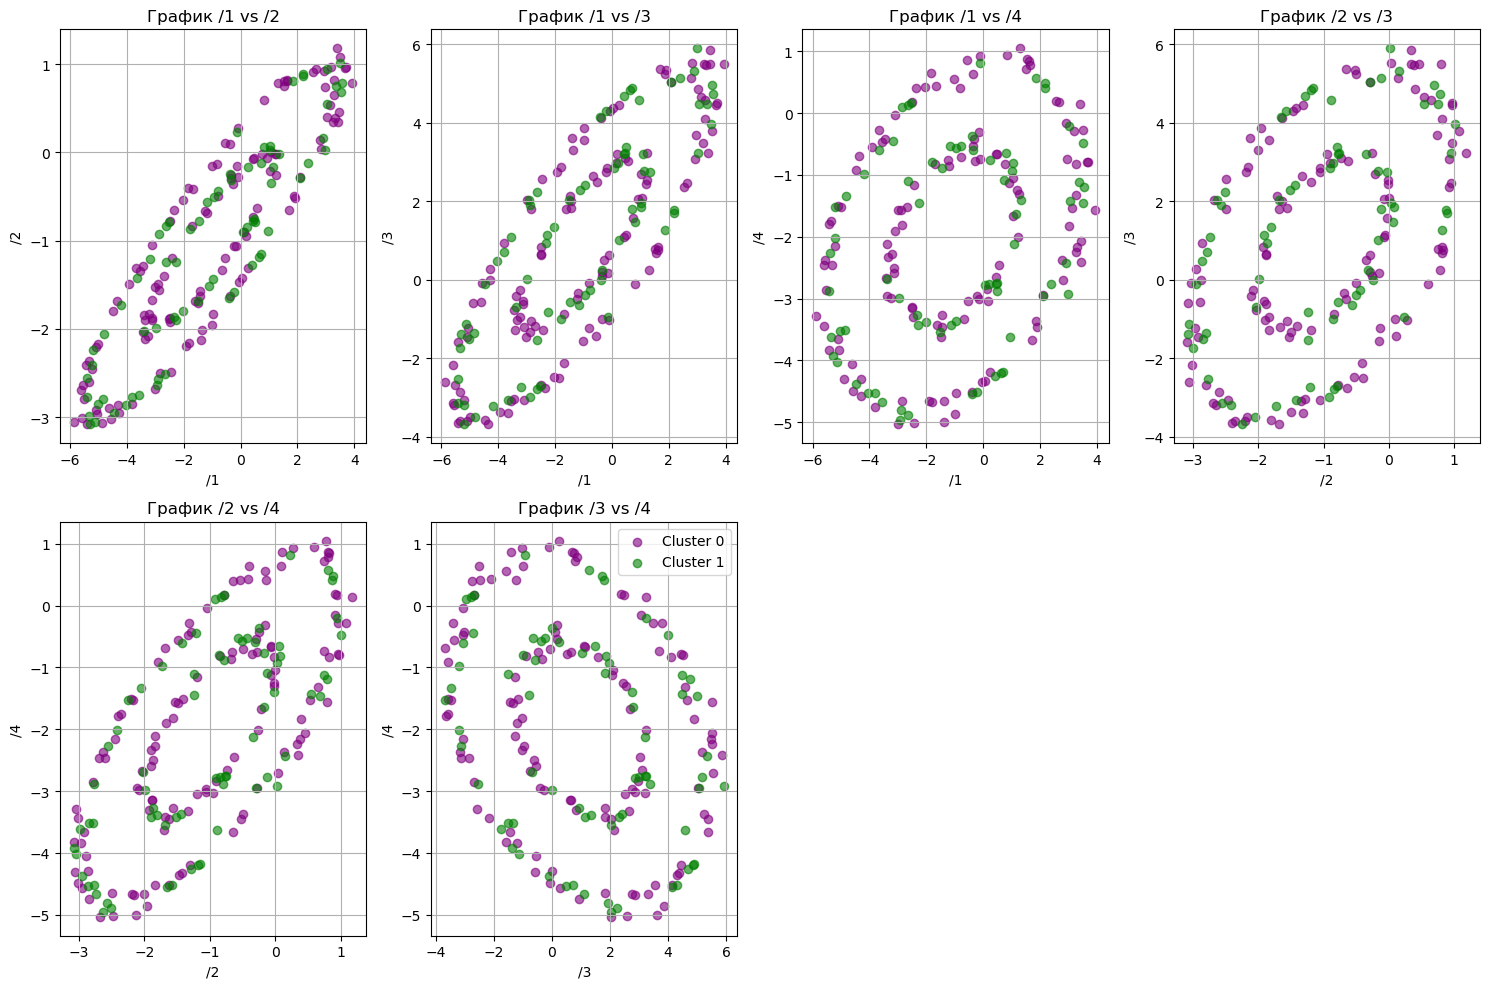

In [125]:
show(X, em_X_clusters)

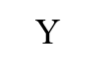

In [69]:
mds = MDS(dissimilarity='precomputed')
Y_transformed = mds.fit_transform(Y_eucl_dist)

# Кластеризация с использованием GMM
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_transformed)

c:\Users\nicks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=2, random_state=0)

In [70]:
# Получение меток кластеров
em_Y_clusters = gmm.predict(Y_transformed)

print("Кластеры:", em_Y_clusters)

Кластеры: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1]


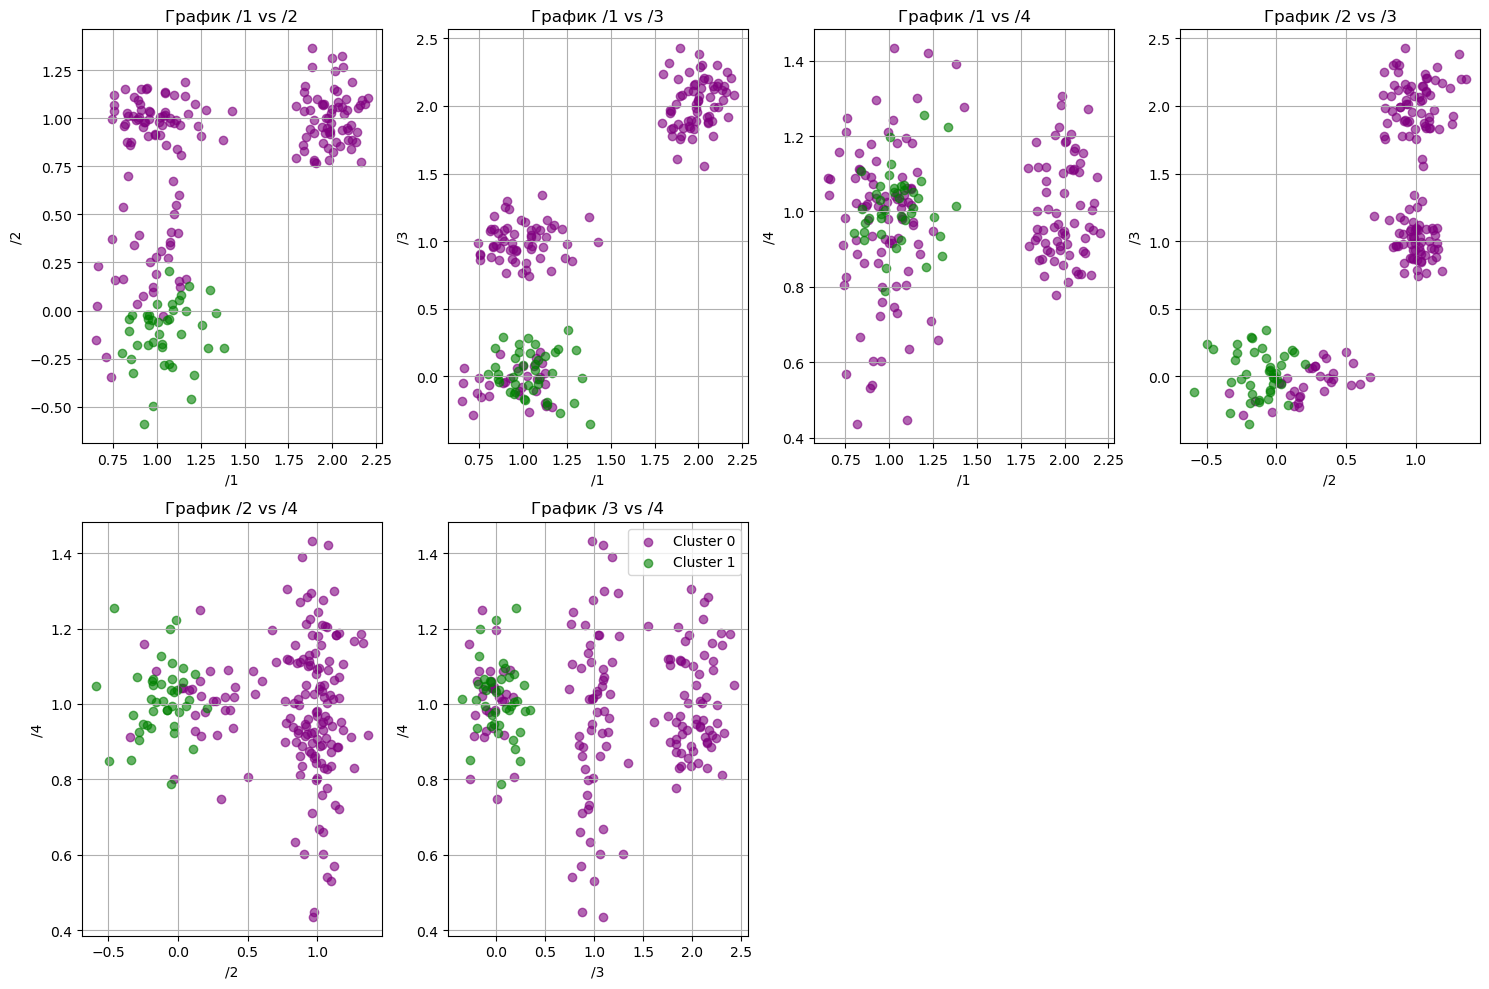

In [126]:
show(Y, em_Y_clusters)

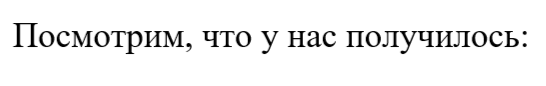

single_clusters_X_eucl_sim_norm            
complete_clusters_X_eucl_sim_norm           
km_clusters_X_eucl_dist            
spectral_clusters_X_eucl_sim_norm      
em_X_clusters       
     
single_clusters_Y_eucl_sim_norm            
complete_clusters_Y_eucl_sim_norm           
km_clusters_Y_eucl_dist            
spectral_clusters_Y_eucl_sim_norm
em_Y_clusters         

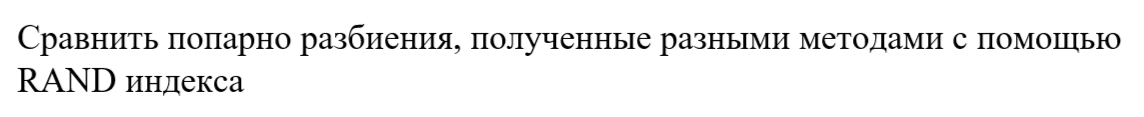

In [56]:
def rand_index(seq1, seq2):
    n = len(seq1)
    a = b = c = d = 0

    # Считаем количество пар элементов
    for i in range(n):
        for j in range(i + 1, n):
            same_in_seq1 = seq1[i] == seq1[j]
            same_in_seq2 = seq2[i] == seq2[j]

            if same_in_seq1 and same_in_seq2:
                a += 1  # Пары в одном подмножестве в обоих разбиениях
            elif not same_in_seq1 and not same_in_seq2:
                b += 1  # Пары в разных подмножествах в обоих разбиениях
            elif same_in_seq1 and not same_in_seq2:
                c += 1  # Пары в одном подмножестве в первом, но в разных во втором
            elif not same_in_seq1 and same_in_seq2:
                d += 1  # Пары в разных подмножествах в первом, но в одном во втором

    # Вычисляем RAND индекс
    total_pairs = a + b + c + d
    if total_pairs == 0:  # Защита от деления на ноль
        return 0.0
    
    rand_index_value = (a + b) / total_pairs
    return rand_index_value


In [57]:
result = rand_index(single_clusters_X_eucl_sim_norm, complete_clusters_X_eucl_sim_norm)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.6907


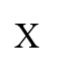

Single Linkage и Complete Linkage

In [58]:
print("Single Linkage")
print(single_clusters_X_eucl_sim_norm)  
print("Complete Linkage")    
print(complete_clusters_X_eucl_sim_norm)  

Single Linkage
[1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1
 1 2 2 2 1 2 2 1 1 2 1 2 2 1 2 2 1 1 1 1 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2]
Complete Linkage
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [59]:
result = rand_index(single_clusters_X_eucl_sim_norm, complete_clusters_X_eucl_sim_norm)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.6907


Single Linkage и k-means

In [61]:
single_clusters_X_eucl_sim_norm[single_clusters_X_eucl_sim_norm == 2] = 0
print("Single Linkage")
print(single_clusters_X_eucl_sim_norm)  
print("k-means")         
print(km_clusters_X_eucl_dist) 

Single Linkage
[1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
k-means
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [62]:
result = rand_index(single_clusters_X_eucl_sim_norm, km_clusters_X_eucl_dist)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.5948


Single Linkage и EM

In [71]:
print("Single Linkage")
print(single_clusters_X_eucl_sim_norm)  
print("EM")
print(em_X_clusters)

Single Linkage
[1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
EM
[0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1]


In [72]:
result = rand_index(single_clusters_X_eucl_sim_norm, em_X_clusters)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.5025


Single Linkage и Spectral

In [117]:
print("Single Linkage")
print(single_clusters_X_eucl_sim_norm)  

print("Spectral")
print(spectral_clusters_X_eucl_sim_norm)

Single Linkage
[1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
Spectral
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [75]:
result = rand_index(single_clusters_X_eucl_sim_norm, spectral_clusters_X_eucl_sim_norm)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.5779


Complete Linkage и k-means

In [77]:
complete_clusters_X_eucl_sim_norm[complete_clusters_X_eucl_sim_norm == 2] = 0
print("Complete Linkage")    
print(complete_clusters_X_eucl_sim_norm)  
print("k-means")         
print(km_clusters_X_eucl_dist) 

Complete Linkage
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
k-means
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [78]:
result = rand_index(complete_clusters_X_eucl_sim_norm, km_clusters_X_eucl_dist)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.8354


Complete Linkage и EM

In [79]:
print("Complete Linkage")    
print(complete_clusters_X_eucl_sim_norm) 
print("EM")
print(em_X_clusters)

Complete Linkage
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
EM
[0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1]


In [80]:
result = rand_index(complete_clusters_X_eucl_sim_norm, em_X_clusters)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.5025


Complete Linkage и Spectral

In [81]:
print("Complete Linkage")    
print(complete_clusters_X_eucl_sim_norm) 
print("Spectral")
print(spectral_clusters_X_eucl_sim_norm)

Complete Linkage
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Spectral
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [82]:
result = rand_index(complete_clusters_X_eucl_sim_norm, spectral_clusters_X_eucl_sim_norm)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.8032


k-means и EM

In [83]:
print("k-means")         
print(km_clusters_X_eucl_dist) 
print("EM")
print(em_X_clusters)

k-means
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
EM
[0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1]


In [84]:
result = rand_index(km_clusters_X_eucl_dist, em_X_clusters)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.4977


k-means и Spectral

In [85]:
print("k-means")         
print(km_clusters_X_eucl_dist)
print("Spectral")
print(spectral_clusters_X_eucl_sim_norm)

k-means
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Spectral
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [86]:
result = rand_index(km_clusters_X_eucl_dist, spectral_clusters_X_eucl_sim_norm)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.9045


EM и Spectral

In [87]:
print("EM")
print(em_X_clusters)
print("Spectral")
print(spectral_clusters_X_eucl_sim_norm)

EM
[0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1]
Spectral
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [88]:
result = rand_index(em_X_clusters, spectral_clusters_X_eucl_sim_norm)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.4977


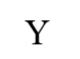

Single Linkage и Complete Linkage

In [131]:
print("Single Linkage")
print(single_clusters_Y_eucl_sim_norm)  
print("Complete Linkage")    
print(complete_clusters_Y_eucl_sim_norm) 

Single Linkage
[0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1]
Complete Linkage
[0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1]


In [132]:
result = rand_index(single_clusters_Y_eucl_sim_norm, complete_clusters_Y_eucl_sim_norm)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 1.0000


Single Linkage и k-means

In [133]:
single_clusters_X_eucl_sim_norm[single_clusters_Y_eucl_sim_norm == 2] = 0
print("Single Linkage")
print(single_clusters_Y_eucl_sim_norm)  
print("k-means")         
print(km_clusters_Y_eucl_dist)

Single Linkage
[0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1]
k-means
[0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1]


In [134]:
result = rand_index(single_clusters_Y_eucl_sim_norm, km_clusters_Y_eucl_dist)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.9415


Single Linkage и EM

In [135]:
result = rand_index(single_clusters_Y_eucl_sim_norm, em_Y_clusters)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.7298


Single Linkage и Spectral

In [139]:
print("Single Linkage")
print(single_clusters_Y_eucl_sim_norm)  

print("Spectral")
print(spectral_clusters_Y_eucl_sim_norm)

Single Linkage
[0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1]
Spectral
[0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0
 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0
 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [140]:
result = rand_index(single_clusters_Y_eucl_sim_norm, spectral_clusters_Y_eucl_sim_norm)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.5779


Complete Linkage и k-means

In [141]:
result = rand_index(complete_clusters_Y_eucl_sim_norm, km_clusters_Y_eucl_dist)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.9415


Complete Linkage и EM

In [143]:
result = rand_index(complete_clusters_Y_eucl_sim_norm, em_Y_clusters)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.7298


Complete Linkage и Spectral

In [147]:
result = rand_index(complete_clusters_Y_eucl_sim_norm, spectral_clusters_Y_eucl_sim_norm)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.5779


k-means и EM

In [151]:
result = rand_index(km_clusters_Y_eucl_dist, em_Y_clusters)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.6907


k-means и Spectral

In [152]:
result = rand_index(km_clusters_Y_eucl_dist, spectral_clusters_Y_eucl_sim_norm)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.6038


EM и Spectral

In [154]:
result = rand_index(em_Y_clusters, spectral_clusters_Y_eucl_sim_norm)
print(f'RAND индекс: {result:.4f}')

RAND индекс: 0.5007
